<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#英文词袋模型应用-以推特文本为例" data-toc-modified-id="英文词袋模型应用-以推特文本为例-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>英文词袋模型应用-以推特文本为例</a></span></li><li><span><a href="#中文词袋模型应用-以微博文本为例" data-toc-modified-id="中文词袋模型应用-以微博文本为例-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>中文词袋模型应用-以微博文本为例</a></span></li><li><span><a href="#个人数据词袋模型应用-以外交部记者会文本为例" data-toc-modified-id="个人数据词袋模型应用-以外交部记者会文本为例-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>个人数据词袋模型应用-以外交部记者会文本为例</a></span></li></ul></div>

词袋模型是自然语言处理中常用的一种文本表示方法，将文本看作词汇的集合，以出现频率表示词汇，忽视词汇之间的顺序和词汇的语义信息。

# 英文词袋模型应用-以推特文本为例
**【代码思路】**<br>
- 读取本地CSV文件
- 定义文本预处理函数，处理内容包括将文本转换为小写、删除url
- 用Sk-learn库中的CountVectorizer方法将文本数据转化为词袋特征矩阵
- 将X定义为通过fit_transform方法从文本数据中提取的词袋特征矩阵，每一行为一个特征词，每一列为一个文档
- 创建词频统计字典，键为特征词，值为出现频率（加总）
- 绘制词云图

In [1]:
import pandas as pd
text_ana=pd.read_csv('text_analysis_twitter.csv')
text_ana=text_ana.drop(['Unnamed: 0'],axis=1) #删除第一列，即名为“Unnamed:0”的列

In [2]:
import re
def preprocess_text(text): #定义处理函数
    text = text.lower() #小写
    text = re.sub(r'http\S+','',text) #基于正则表达式用空字符串替换http后面的连续非空字符串，即删除url
    return text

In [3]:
from sklearn.feature_extraction.text import CountVectorizer #将文本转化为词袋模型的特征矩阵
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_ana['text'].apply(preprocess_text)) #将经过预处理的文本数据应用于 CountVectorizer，并通过 fit_transform 方法将文本转换为词袋特征矩阵
print('词袋特征矩阵的形状：', X.shape) #打印词袋特征矩阵 X 的形状，即矩阵由多少行多少列组成
print('特征词列表：', vectorizer.get_feature_names_out()) #获取词袋模型中的特征词列表

词袋特征矩阵的形状： (300000, 121376)
特征词列表： ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


In [4]:
feature_words = vectorizer.get_feature_names_out() #获取词袋模型中的特征词列表
word_freq = dict(zip(feature_words, X.sum(axis=0).A1)) #计算了每个特征词在文本数据中的频次

In [5]:
sorted (word_freq.items(), key = lambda x: x[1], reverse= True) #将word_freq字典中的单词按照频率从高到低排序，并返回一个按照频率降序排列的元组列表。

[('the', 247160),
 ('to', 235370),
 ('of', 112428),
 ('in', 104912),
 ('and', 104025),
 ('for', 102100),
 ('rt', 83461),
 ('on', 72986),
 ('amp', 65500),
 ('is', 64785),
 ('we', 53564),
 ('our', 49736),
 ('this', 45532),
 ('you', 40235),
 ('with', 39027),
 ('it', 38749),
 ('that', 38161),
 ('qt', 35691),
 ('at', 33821),
 ('are', 31301),
 ('will', 29565),
 ('tax', 28529),
 ('my', 27644),
 ('be', 26920),
 ('from', 26202),
 ('today', 24574),
 ('have', 23005),
 ('by', 22865),
 ('more', 22665),
 ('trump', 19894),
 ('bill', 19534),
 ('their', 19129),
 ('about', 18973),
 ('as', 18391),
 ('all', 18295),
 ('not', 18197),
 ('your', 17615),
 ('who', 17098),
 ('can', 15465),
 ('health', 14215),
 ('has', 14119),
 ('an', 13861),
 ('they', 13858),
 ('us', 13825),
 ('here', 13799),
 ('house', 13680),
 ('people', 13486),
 ('great', 13468),
 ('now', 13113),
 ('families', 12838),
 ('must', 12787),
 ('up', 12602),
 ('was', 12513),
 ('need', 12313),
 ('americans', 12279),
 ('help', 12145),
 ('act', 12064),

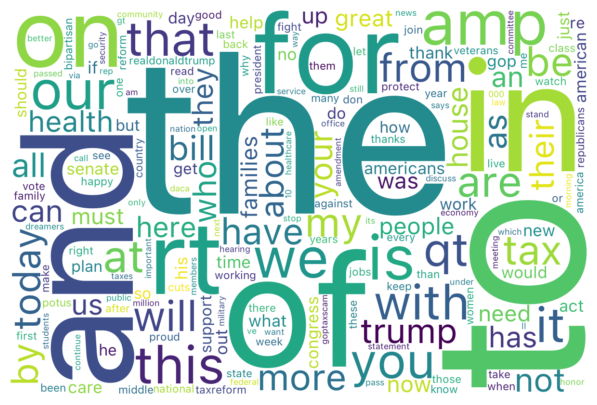

<Figure size 640x480 with 0 Axes>

In [6]:
from wordcloud import WordCloud #导入绘制词云的库
import matplotlib.pyplot as plt #绘图工具
wc = WordCloud(width=1200, height=800, background_color='white', font_path='/Library/Fonts/SF-Pro-Text-Regular.otf').generate_from_frequencies(word_freq) #定义长宽和字体
plt.figure(figsize=(10,5)) #图像尺寸
plt.imshow(wc, interpolation='bilinear') #使用双线性插值来平滑显示图像
plt.axis('off') #关闭图形的坐标轴显示
plt.show()
plt.savefig('wordcloud_twi.png',dpi=100) #保存

# 中文词袋模型应用-以微博文本为例
**【代码思路】**
- 提取出csv文件中“标题/微博内容”列
- 使用jieba分词
- 构建列表，元素为经过分词的每条微博的“标题/微博内容”数据
- 构建词袋特征矩阵
- 按降序打印特征词及其词频
- 依据结果绘制词云图

In [7]:
import pandas as pd
text_ana = pd.read_csv('text_analysis_weibo.csv', index_col = 0) #将 CSV 文件中的第一列作为 DataFrame 的行索引
text_ana #观察数据结构，共有50000行8列

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


In [8]:
text = list(text_ana['标题/微博内容']) #选择名为 '标题/微博内容' 的列，即提取出要分析的文本列，并将其转换成列表，元素为每条标题/微博内容，数据类型为字符串
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

In [9]:
import jieba
def word_segmentation(text): #定义分词函数
    words = jieba.lcut(text) #jieba库的lcut方法可以将文本字符串按照词语进行切分，并返回一个词语列表
    return ' '.join(words) #将分词结果以空格分隔的字符串形式返回
text_ana['标题/微博内容'] = text_ana['标题/微博内容'].astype(str).apply(word_segmentation) #应用于'标题/微博内容'列
text_ana['标题/微博内容'].head() #显示分词结果前5行

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/qy/l6pd6hxj5gn51xzk2nltjm2h0000gn/T/jieba.cache
Loading model cost 0.543 seconds.
Prefix dict has been built successfully.


0    # 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言...
1                                                 转发 C
2    【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能...
3    丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程...
4        诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！
Name: 标题/微博内容, dtype: object

In [10]:
text= list(text_ana['标题/微博内容'].dropna()) # 将分词结果转换成列表，并删除缺失值，每一个元素为经过分词的一条微博文本
text

['# 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言 自 在 人心   \u200b \u200b',
 '转发 C',
 '【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能 唱 跳 不 设限 ， 运动 联 濛 开 新年 🇨 🇳   期待 全能 音乐 人 @ 刘雨昕   与 # 运动 者 联 濛 # 一起 ， 为 冬奥 赛事 助力 加油 ！ 】',
 '丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程鑫   二十 成金筑梦鑫 世界 #   大年初一 锁定 @ 北京 卫视   和 门面 主舞 @ 时代 少年 团 - 丁程鑫   一起 过大年 ， 拥抱 冰雪 ， 致敬 冬奥 ！',
 '诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！',
 '转发 C',
 '# 熊猫 守护者 ## 全面 二 创冰墩 墩 # 北京 冬奥会 如火如荼 地 进行 中 ， 滚滚 我 的 好 朋友 冰墩 墩 也 十分 活跃 ， 看 滚滚 我 做 一组 舒展 运动 ， 为 中国 健儿 加油 鼓 劲儿 ！ [ 嘻嘻 ] [ 嘻嘻 ]   http : / / t . cn / A6ilerDZ   视频 来源 ： @ 桃花源 生态 保护 基金会   \u200b \u200b \u200b',
 '转发 C',
 '2022 北京 冬奥会 加油 ！ 冰墩 墩 雪容融 也 非常 可爱 ！ 期待 我国 奥运健儿 们 的 精彩 表现 [ 开学 季 ] # 云 支教 迎 冬奥 #   \u200b \u200b',
 '和 @ TFBOYS - 易 烊 千玺   一起 助力 东奥 ！ 一起 向 未来 ！',
 '转发 C',
 '[ 心 ]',
 '守护 [ 心 ]',
 '# 易 烊 千玺 邀 你 唱响 一起 向 未来 #   / / @ M28 号 星球 : # 易 烊 千玺 邀 你 唱响 一起 向 未来 #   26.17',
 '/ / @ 翔霖 神谕 : 感谢 @ 爱奇艺   的 分享 。 新年 胜 旧年 ， 春妍 惹 绚烂 ， 万事 胜意 与 平安 喜乐 的 祝福 徒增 和 乐 ， @ 时代 少年 团 - 严浩翔   @ 

In [11]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer() #将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)
print('词袋特征矩阵的形状：', X.shape)

词袋特征矩阵的形状： (50000, 208611)


In [12]:
print('特征词列表：', vectorizer.get_feature_names_out()) #调出特征词列表

特征词列表： ['00' '000' '0000' ... '龟速' '龟速车' '龟龟']


In [13]:
list(X.toarray())  #将稀疏矩阵X转换为密集矩阵，并将其转换为列表格式，稀疏矩阵不存储值为0的元素，密集矩阵存储

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

In [14]:
feature_words = vectorizer.get_feature_names_out() #获取特征词列表
word_freq = dict(zip(feature_words, X.sum(axis=0).A1)) #计算特征词出现频次，组合成字典，键为特征词，值为按列求和的特征词频数

In [15]:
len(word_freq) #检查特征词的数量，和词袋特征矩阵的列数相同

208611

In [16]:
sorted(word_freq.items(), key = lambda x: x[1], reverse=True) #将字典中的键值对转化为元组，将字典转化为列表，按照列表的第二个元素，即频数进行降序排序

[('发展', 52421),
 ('建设', 38186),
 ('中国', 37685),
 ('企业', 36472),
 ('市场', 35827),
 ('汽车', 30384),
 ('2022', 29315),
 ('增长', 26601),
 ('经济', 25205),
 ('公司', 24908),
 ('亿元', 22701),
 ('项目', 21717),
 ('国家', 21290),
 ('政策', 21258),
 ('工作', 21089),
 ('10', 20832),
 ('服务', 19591),
 ('新能源', 19181),
 ('同比', 19083),
 ('投资', 19015),
 ('推进', 18856),
 ('行业', 18277),
 ('我们', 18252),
 ('转发', 17827),
 ('产业', 17422),
 ('提升', 17384),
 ('产品', 16814),
 ('数据', 16807),
 ('实现', 16706),
 ('推动', 15882),
 ('2021', 15693),
 ('持续', 15494),
 ('技术', 14423),
 ('nbsp', 14154),
 ('全国', 13998),
 ('全球', 13897),
 ('创新', 13695),
 ('目前', 13683),
 ('支持', 13655),
 ('疫情', 13574),
 ('主要', 13414),
 ('今年', 13381),
 ('方面', 13367),
 ('可以', 13264),
 ('11', 13129),
 ('城市', 13074),
 ('需求', 13039),
 ('加快', 12477),
 ('国际', 12346),
 ('重要', 12330),
 ('发布', 12308),
 ('通过', 12258),
 ('国内', 12218),
 ('12', 12139),
 ('一个', 12005),
 ('相关', 11992),
 ('实施', 11824),
 ('领域', 11744),
 ('进行', 11733),
 ('理想', 11640),
 ('影响', 11637),
 ('问题', 11600),
 

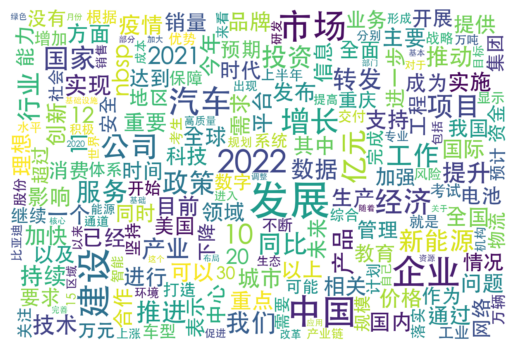

In [17]:
#绘制词云图
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='/Library/Fonts/STHeiti Medium.ttc', background_color='white', width=1200, height=800,max_words=200, max_font_size=100  ).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 个人数据词袋模型应用-以外交部记者会文本为例
**【代码思路】**
- 文本的存储形式为文件夹/.txt，即由1000个.txt文本组成的文件夹，因此读取数据需要遍历文件夹，将每个文件的内容作为一个文档，或列表中的元素
- 使用jieba分词，并过滤掉事先准备的停用词
- 构建词袋特征矩阵
- 按降序打印特征词及其词频
- 依据结果绘制词云图

In [18]:
# 导入需要使用的库和方法
import os
import pandas as pd
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [22]:
corpus_path = "/Users/liuzhixin/Documents/硕士研究生/课程文件/第二学期/文本数据挖掘/外交部发言文稿（按文档）" #定义文件夹路径

In [23]:
stopwords_path = "/Users/liuzhixin/Documents/硕士研究生/课程文件/第二学期/文本数据挖掘/workshop1/stopwords.txt" #加载停用词列表
with open(stopwords_path, 'r', encoding='utf-8') as f: #以只读模式打开
    stopwords = [line.strip() for line in f]   #按行读取，删除换行符，每行内容作为一个元素存储在列表中

In [24]:
file_contents = [] #创建空列表存储文本文件内容
for filename in os.listdir(corpus_path):  #遍历文件夹
    if filename.endswith('.txt'): #读取.txt结尾的文件
        filepath = os.path.join(corpus_path, filename) #构建文本的绝对路径
        with open(filepath, 'r', encoding='utf-8') as file: #读取文件，将文件对象赋值给变量file。
            content = file.read() #将内容存储在content中
            file_contents.append(content) #在content中添加

In [25]:
def word_segmentation(text):
    words = jieba.lcut(text)
    # 过滤停用词
    words = [word for word in words if word not in stopwords] 
    return ' '.join(words)  #将过滤停用词后的词语列表words通过空格连接成一个字符串，并作为函数的返回值

In [26]:
processed_text = [word_segmentation(text) for text in file_contents] #经过预处理后的文本列表

In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_text) #将文本数据转化为词袋特征矩阵
print('词袋特征矩阵的形状:', X.shape) #有1000个文档，35803个特征词

词袋特征矩阵的形状: (1000, 35803)


In [31]:
feature_words = vectorizer.get_feature_names_out() #获取特征词列表
word_freq = dict(zip(feature_words, X.sum(axis=0).A1)) #计算特征词出现频次，组合成字典，键为特征词，值为按列求和的特征词频数

In [32]:
sorted(word_freq.items(), key = lambda x: x[1], reverse=True) 

[('中国', 29018),
 ('中方', 23649),
 ('美国', 11449),
 ('国家', 11226),
 ('国际', 10314),
 ('合作', 10264),
 ('发展', 9700),
 ('对此', 7283),
 ('美方', 6671),
 ('有何', 6599),
 ('评论', 5743),
 ('疫情', 5735),
 ('全球', 5260),
 ('世界', 4638),
 ('社会', 4374),
 ('报道', 4327),
 ('汪文斌', 4285),
 ('推动', 3948),
 ('维护', 3906),
 ('关系', 3886),
 ('经济', 3874),
 ('支持', 3838),
 ('人民', 3771),
 ('赵立坚', 3742),
 ('和平', 3638),
 ('稳定', 3629),
 ('地区', 3506),
 ('提供', 3487),
 ('一个', 3178),
 ('组织', 3098),
 ('政治', 3072),
 ('人权', 3013),
 ('反对', 2976),
 ('外长', 2877),
 ('外交部', 2866),
 ('发言人', 2749),
 ('各国', 2748),
 ('联合国', 2689),
 ('原则', 2676),
 ('相关', 2638),
 ('希望', 2594),
 ('企业', 2519),
 ('主席', 2515),
 ('情况', 2511),
 ('新冠', 2504),
 ('作出', 2424),
 ('总统', 2391),
 ('各方', 2373),
 ('立场', 2354),
 ('香港', 2215),
 ('发布', 2208),
 ('疫苗', 2179),
 ('介绍', 2177),
 ('台湾', 2155),
 ('停止', 2145),
 ('包括', 2111),
 ('阿富汗', 2053),
 ('会议', 1994),
 ('日本', 1948),
 ('新疆', 1947),
 ('习近平', 1929),
 ('领域', 1883),
 ('利益', 1864),
 ('媒体', 1857),
 ('毛宁', 1833),
 ('抗疫', 1789

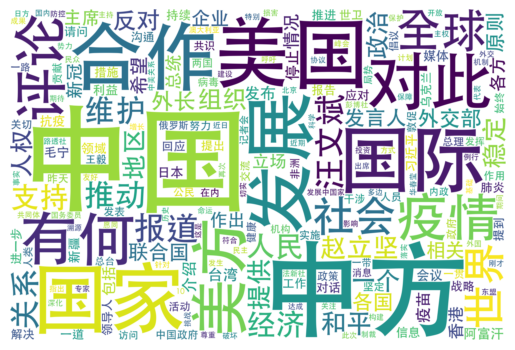

In [34]:
wordcloud = WordCloud(
    font_path="/Library/Fonts/STHeiti Medium.ttc",
    background_color='white', 
    width=2400,
    height=1600,
).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.pdf", format="pdf", dpi=300)  
plt.show()